# Python Final Project 

## Reading Data and Importing Libraries

In [2]:
import pandas as pd

# Read Excel
regions = pd.read_excel('WDIW.xlsx')

# Filter countries by team cool name 
jetFire = regions[regions['Cool Name'] == 'Jetfire' ]



In [3]:
# Number of missing values

# Number of null values aggregated by sum
missingSorted = jetFire.isnull().agg('sum').sort_values(ascending=False)

# More than 0 values, a total of 54 columns
missingAtLeastOne = missingSorted[missingSorted > 0]

# View Informations
missingAtLeastOne

Income share held by fourth 20%                                                                            22
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)                                        22
Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)           22
GINI index (World Bank estimate)                                                                           22
Government expenditure on education, total (% of government expenditure)                                   22
Income share held by highest 20%                                                                           22
Income share held by lowest 20%                                                                            22
Income share held by second 20%                                                                            22
Income share held by third 20%                                                                             22
Literacy r

## Missing Values 

### Strategy 1: Finding the values in World Bank

#### Diego

##### Subsetting the countries

In [4]:
# 6 Countries of Diego
diegoCols = ['ITA','LIE','LUX','MCO','NLD','PRT']

# Subset of Countr - dies
diegoDf = jetFire[jetFire['Country Code'].isin(diegoCols)]

##### Checking Missing Values per countries

How many Missing values each country has?

In [5]:
# Checking mssing values per countries
diegoTranspose = diegoDf.transpose()

diegoTranspose.columns = diegoCols

diegoMissingSorted = (diegoTranspose.isnull().sum().sort_values(ascending = False) / len(diegoTranspose)) * 100

diegoMissingSorted

# Monaco, liechtenstein, Luxemburg, Portugal, Netherlands, Italy 

MCO    72.058824
LIE    67.647059
LUX    33.823529
PRT    32.352941
NLD    32.352941
ITA    32.352941
dtype: float64

##### Missing Values per Column
How many missing values each indicator has?

In [6]:
# Checking missing values per Column
diegoMissingCols = diegoDf.isnull().sum().sort_values(ascending = False)

# 68 indicators
print(f'Matrix Shape: {diegoDf.shape}') 

# Indicators with 100% missing values
print(diegoMissingCols[diegoMissingCols == 6])

Matrix Shape: (6, 68)
Income share held by fourth 20%                                                                            6
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)         6
Income share held by lowest 20%                                                                            6
Literacy rate, adult total (% of people ages 15 and above)                                                 6
Literacy rate, youth total (% of people ages 15-24)                                                        6
Income share held by highest 20%                                                                           6
Government expenditure on education, total (% of government expenditure)                                   6
GINI index (World Bank estimate)                                                                           6
Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)        

##### More detailed inspection of missing values

In [7]:
# Indicators with 2 and 3 missing datapoints

diegoMissingCols[diegoMissingCols < 6][diegoMissingCols > 1]

Population in the largest city (% of urban population)                      3
Employment in agriculture (% of total employment) (modeled ILO estimate)    2
Employment in industry (% of total employment) (modeled ILO estimate)       2
Adolescent fertility rate (births per 1,000 women ages 15-19)               2
Armed forces personnel (% of total labor force)                             2
Agriculture, forestry, and fishing, value added (% of GDP)                  2
Age dependency ratio, young (% of working-age population)                   2
Employment in services (% of total employment) (modeled ILO estimate)       2
Industry (including construction), value added (% of GDP)                   2
Age dependency ratio (% of working-age population)                          2
Population ages 15-64 (% of total population)                               2
Tax revenue (% of GDP)                                                      2
Services, value added (% of GDP)                                

In [8]:
# Only one missing value
diegoMissingCols[diegoMissingCols >= 1 ][diegoMissingCols < 2]

Rural population (% of total population)    1
Life expectancy at birth, total (years)     1
GDP (current US$)                           1
GDP growth (annual %)                       1
Fertility rate, total (births per woman)    1
Birth rate, crude (per 1,000 people)        1
Death rate, crude (per 1,000 people)        1
dtype: int64

##### Missing Values by Country Data Frame
This data frame is composed of indicators with at least 1 missing value

In [10]:
# Subset indicators with at least 1 missing value. This is a boolean DataFrame
diegoMissingBool = diegoDf[diegoMissingCols[diegoMissingCols >= 1].index].isnull().copy()

# Is null is created again to have the indices, I did this the first time 
# mask = diegoMissingBool.isnull().any()
# diegoMissingbyCountry = diegoDf[mask.index.copy()]

# A more elegant way: 

diegoMissingbyCountry = diegoDf[diegoMissingBool.columns.copy()]


# Created Country code column in order to add it as an index
diegoMissingbyCountry.loc[:,'CountryCode'] = diegoDf['Country Code'].copy()

# modified index to have the country code. Easier subsetting!
diegoMissingbyCountry = diegoMissingbyCountry.set_index('CountryCode').copy()

# The final dataframe contains the dataframe that has missing values 
diegoMissingbyCountry





,Income share held by fourth 20%,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)",Income share held by lowest 20%,"Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)",Income share held by highest 20%,"Government expenditure on education, total (% of government expenditure)",GINI index (World Bank estimate),"Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)",...,Population ages 0-14 (% of total population),Merchandise trade (% of GDP),Military expenditure (% of GDP),Rural population (% of total population),"Life expectancy at birth, total (years)",GDP (current US$),GDP growth (annual %),"Fertility rate, total (births per woman)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)"
CountryCode,,,,,,,,,,,,,,,,,,,,,
ITA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.475071,49.345301,1.366529,29.856,83.243902,1.946570e+12,1.684183,1.34,7.6,10.7
LIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,85.685,82.258537,NaN,NaN,1.61,8.9,6.6
LUX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.065111,61.930768,0.576459,9.273,82.685366,6.231636e+10,1.545661,1.41,10.4,7.1
MCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.400947e+09,-3.500000,NaN,NaN,NaN
NLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.353130,147.474914,1.158527,8.923,81.560976,8.318099e+11,2.910903,1.66,9.9,8.8
PRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.667078,64.153573,1.669977,35.348,81.124390,2.193081e+11,2.795024,1.36,8.4,10.6


##### Worldbank API - Easy webscraping

In [11]:
import world_bank_data as wb

# It's necessary to get the indicators code, this is different from the column names. 
    # E.g: Income share held by fourth 20% is coded as: SI.DST.04TH.20
    
missingIndicators = diegoMissingCols[diegoMissingCols >= 1].index.copy()

# Created empty dataframe with the column format that the API will return
    # We just need to append in a simple loop
indicatorsCodedMissing = pd.DataFrame(columns = ['name', 'unit', 'source', 'sourceNote', 'sourceOrganization', 'topics'])

# Loop to get the missing indicators and store the in the indicatorsCodedMissing data frame
for i in list(missingIndicators):
    indicatorsCodedMissing = indicatorsCodedMissing.append(wb.search_indicators(i))

# We can view the first the indicator names
print(f'{indicatorsCodedMissing.index[0:3]} \n')

# We can view the head of the dataframe as well, we have really interesting info! 
indicatorsCodedMissing.head()

Index(['SI.DST.04TH.20', 'SI.DST.FRST.20', 'SI.DST.05TH.20'], dtype='object') 



,name,unit,source,sourceNote,sourceOrganization,topics
SI.DST.04TH.20,Income share held by fourth 20%,,World Development Indicators,Percentage share of income or consumption is t...,"World Bank, Development Research Group. Data a...",Poverty
SI.DST.FRST.20,Income share held by lowest 20%,,World Development Indicators,Percentage share of income or consumption is t...,"World Bank, Development Research Group. Data a...","Poverty ,Aid Effectiveness"
SI.DST.05TH.20,Income share held by highest 20%,,World Development Indicators,Percentage share of income or consumption is t...,"World Bank, Development Research Group. Data a...",Poverty
SI.DST.03RD.20,Income share held by third 20%,,World Development Indicators,Percentage share of income or consumption is t...,"World Bank, Development Research Group. Data a...",Poverty
SI.DST.02ND.20,Income share held by second 20%,,World Development Indicators,Percentage share of income or consumption is t...,"World Bank, Development Research Group. Data a...",Poverty


In [12]:
# Now we obtain the data for the specific countries that we need

import wbdata
from datetime import datetime

# missingIndicators = diegoMissingCols[diegoMissingCols > 1] 

# The indicators argument of get_dataframe needs to be a dictionary with 
    # the codes (previous step) as the key and the new column names as the values (missing Indicators)
    # The output is a dataframe, notice that it has hierarchical indexing or multindexing (it makes it more fun and useful)
    # It will return the Data frame with all the years in the world bank 
    
keys = list(indicatorsCodedMissing.index)
values = list(missingIndicators) 


wbQueriedDiego = wbdata.get_dataframe(indicators = dict(zip(keys,values)), country = diegoCols, convert_date = False)

wbQueriedDiego.head()


ModuleNotFoundError: No module named 'wbdata'

In [ ]:
# Now we subset for a particular year

wbQueriedDiego.sort_index(inplace=True)

# What is the total of missing values that there are per year 
for i in range(2013,2019,1):
    print('{} missing values out of {} for year {} '.format(wbQueriedDiego.xs(str(i),level='date'). 
                                                            transpose().isnull().sum().sum(), # Calculates overall sum of null values
                                                            wbQueriedDiego.shape[1] * len(wbQueriedDiego.index.levels[0]), # Number of columns * number of countries = total possible missing values 
                                                i) # ith year 
        )

# It seems that 2015 is the most non-missing updated info that we can obtain 

# data for 2015 is queried
wbQueriedDiego2015 = wbQueriedDiego.xs('2015',level='date')

# Printing the data frame to know the contents
wbQueriedDiego2015

# saving it to excel
   
# wbQueriedDiego2015.to_excel('worldBank2015DiegoCountries.xlsx')  # This is commented so I don't overwrite by mistake the file

### Global Missing Values Analysis 

#### API call for Global Missing Values


In [ ]:
import pandas as pd

# Read Excel
regions = pd.read_excel('WDIW.xlsx')

# Filter countries by team cool name 
jetFire = regions[regions['Cool Name'] == 'Jetfire' ]

# Copy original dataset for missingValues treatment
missingValuesDf = jetFire.copy()

# Checking missing values per countries
missingValuesDfTranspose = missingValuesDf.transpose()

missingValuesDfTranspose.columns = missingValuesDf['Country Code']

missingValuesSortedByCountry = (missingValuesDfTranspose.isnull().
                                sum().
                                sort_values(ascending = False) / len(missingValuesDfTranspose)) * 100

missingValuesSortedByCountry

# NEW CELLL


# Checking missing values per Column
missingValuesByColumn = missingValuesDf.isnull().\
                        sum().sort_values(ascending = False)

# 68 indicators
print(f'Original Matrix Shape: {missingValuesDf.shape}') 

missingValuesByColumn

# Indicators with 100% missing values
print(missingValuesByColumn[missingValuesByColumn == 22])

# NEW CELL

# Missing Values less than 22 

missingValuesByColumn[missingValuesByColumn < 22]


# Visualize distribution of missing values by column 
missingValuesByColumn[missingValuesByColumn].plot.box()

# Visualize distribution of missing values by column except 100% missing values (< 22)
# Notice how the distribution change if we don't include the 22 missing values
missingValuesByColumn[missingValuesByColumn < 22].plot.box()

# NEXT CELL 



# Subset indicators with at least 1 missing value. This is a boolean DataFrame
missingValuesBool = missingValuesDf[missingValuesByColumn[missingValuesByColumn >= 1].index].isnull().copy()

# Is null is created again to have the indices, I did this the first time 
# mask = diegoMissingBool.isnull().any()
# diegoMissingbyCountry = diegoDf[mask.index.copy()]

# A more elegant way: 
# Extracting from the original values the name of the columns that have at least 1 N/A
missingValuesSubset = missingValuesDf[missingValuesBool.columns.copy()]


# Created Country code column in order to add it as an index
missingValuesSubset.loc[:,'CountryCode'] = missingValuesDf['Country Code'].copy()

# modified index to have the country code. Easier subsetting!
missingValuesSubset = missingValuesSubset.set_index('CountryCode').copy()

# The final dataframe contains the dataframe that has missing values 
missingValuesSubset


# NEXT CELL

def extractAllIndicators():
    import world_bank_data as wb

    # It's necessary to get the indicators code, this is different from the column names. 
        # E.g: Income share held by fourth 20% is coded as: SI.DST.04TH.20

    missingIndicators = missingValuesByColumn[missingValuesByColumn >= 1].index.copy()


    # Created empty dataframe with the column format that the API will return
        # We just need to append in a simple loop
    indicatorsCodedMissing = pd.DataFrame(columns = ['name', 'unit', 'source', 'sourceNote', 'sourceOrganization', 'topics'])


    # Loop to get the missing indicators and store the in the indicatorsCodedMissing data frame
    for i in list(missingIndicators):
        indicatorsCodedMissing = indicatorsCodedMissing.append(wb.search_indicators(i))

    # We can view the first the indicator names
#     print(f'{indicatorsCodedMissing.index[0:3]} \n')

    # We can view the head of the dataframe as well, we have really interesting info! 
#     indicatorsCodedMissing.head()

    # Shape of matrix 
#     indicatorsCodedMissing.shape

    return indicatorsCodedMissing

# Now we obtain the data for the specific countries that we need

import wbdata
from datetime import datetime

# missingIndicators = diegoMissingCols[diegoMissingCols > 1] 

# The indicators argument of get_dataframe needs to be a dictionary with 
    # the codes (previous step) as the key and the new column names as the values (missing Indicators)
    # The output is a dataframe, notice that it has hierarchical indexing or multindexing (it makes it more fun and useful)
    # It will return the Data frame with all the years in the world bank 
    
keys = list(indicatorsCodedMissing.index)
values = list(missingIndicators) 


wbQueriedAll = wbdata.get_dataframe(indicators = dict(zip(keys,values)), country = list(missingValuesDf.index), 
	convert_date = False)

wbQueriedAll.head()
# Save to csv
# wbQueriedAll.to_csv('wbQueriedAll.csv')


#### Read saved csv with missing indicators. 
Csv from section 1.2.2.1


In [ ]:
import pandas as pd
wbQueriedAll = pd.read_csv('missingValuesAnalysis/wbQueriedAll.csv', index_col = [0,1],skipinitialspace=True)

In [ ]:
# Now we subset for a particular year

wbQueriedAll.sort_index(inplace=True)

# What is the total of missing values that there are per year 
for i in range(2013,2019,1):
    print('{} missing values out of {} for year {} '.format(wbQueriedAll.xs(i,level='date'). 
                                                            transpose().isnull().sum().sum(), # Calculates overall sum of null values
                                                            wbQueriedAll.shape[1] * len(wbQueriedAll.index.levels[0]), # Number of columns * number of countries = total possible missing values 
                                                i) # ith year 
        )

### Download all data from all the country and all the indicators
The saved dataframe is called wbQueriedAllFull.csv

In [ ]:
allIndicators = list(jetFire.columns[6:])
allCountries = list(jetFire['Country Code'])

import world_bank_data as wb

indicatorsCodedAll = pd.DataFrame(columns = ['name', 'unit', 'source', 'sourceNote', 'sourceOrganization', 'topics'])

# There is a bug using the search_indicators method, it didn't return the proper searched indicators
# Loop to get the missing indicators and store the in the indicatorsCodedMissing data frame
# for i in allIndicators:
#     indicatorsCodedAll = indicatorsCodedAll.append(wb.search_iwb.get_indicators()


# Debugged way: 
universalIndicators = wb.get_indicators(source = 2)

for indicator in allIndicators:
    indicatorsCodedAll = indicatorsCodedAll.append(universalIndicators[universalIndicators['name'] == indicator])


# We can view the first the indicator names
print(f'{indicatorsCodedAll.index[0:3]} \n')

# We can view the head of the dataframe as well, we have really interesting info! 
indicatorsCodedAll.head()

# Shape of matrix 
indicatorsCodedAll.shape

# 

# Now we obtain the data for the specific countries that we need

import wbdata
from datetime import datetime

# missingIndicators = diegoMissingCols[diegoMissingCols > 1] 

# The indicators argument of get_dataframe needs to be a dictionary with 
    # the codes (previous step) as the key and the new column names as the values (missing Indicators)
    # The output is a dataframe, notice that it has hierarchical indexing or multindexing (it makes it more fun and useful)
    # It will return the Data frame with all the years in the world bank 
    
keys = list(indicatorsCodedAll.index)
values = allIndicators


wbQueriedAllFull = wbdata.get_dataframe(indicators = dict(zip(keys,values)), country = allCountries, 
	convert_date = False)

wbQueriedAllFull.head()
# Save to csv
# wbQueriedAllFull.to_csv('wbQueriedAllFull.csv')

### Read all years/countries dataset
#### Find which years have the least amount of values
#### Save the dataset of all the indicators for year 2017
This is the previous dataset wbQueriedAllFull.csv

In [ ]:
wbQueriedAllFull = pd.read_csv('wbQueriedAllFull.csv', dtype={'date':str}, index_col=['country','date'])


for i in range( 2010, 2019):
    print(i,'-',(wbQueriedAllFull.xs(i,level='date').isnull().sum().sum() / len(wbQueriedAllFull) *100 ).round(2), '%' )


# wbFull2017 = wbQueriedAllFull.xs(2017,level='date')

# wbFull2017.to_csv('wbFull2017.csv')

### Find missing values of 2017

The NAs of 2017 will be looked from 2019 to 2015

In [ ]:

try:
    wbQueried2019 = wbQueriedAllFull.xs('2019',level='date')
    wbQueried2018 = wbQueriedAllFull.xs('2018',level='date')
    wbQueried2017 = wbQueriedAllFull.xs('2017',level='date')
    wbQueried2016 = wbQueriedAllFull.xs('2016',level='date')
    wbQueried2015 = wbQueriedAllFull.xs('2015',level='date')
except:
    print('this data was read from the csv file, date index is an integer')
    wbQueried2019 = wbQueriedAllFull.xs(2019,level='date')
    wbQueried2018 = wbQueriedAllFull.xs(2018,level='date')
    wbQueried2017 = wbQueriedAllFull.xs(2017,level='date')
    wbQueried2016 = wbQueriedAllFull.xs(2016,level='date')
    wbQueried2015 = wbQueriedAllFull.xs(2015,level='date')

In [ ]:
# wbQueried2017.fillna(wbQueried2016)

# wbQueried2017
# DENMARK BIRTH RATE SKILLSED HEALTH 

wbQueried2017 = wbQueriedAllFull.xs(2017,level='date')
wbQueriedYear2017 = wbQueried2017.isnull().astype(int)

# Replace all NON-Missing values (0) for the year that we encountered them 
# wbQueried2017IsNull.replace(0,int(2017),inplace=True)
wbQueriedYear2017.replace(0,int(2017),inplace=True)

# Replace all NULL values(evaluated as 1) for NAN
# wbQueried2017IsNull.replace(1,np.nan,inplace=True)
wbQueriedYear2017.replace(1,np.nan,inplace=True)


# wbQueried2017IsNull = wbQueried2017IsNull.fillna(wbQueried2018)



# wbQueriedYear2019 = wbQueriedAllFull.xs('2019',level='date')

wbQueriedYear2019 = wbQueried2019.isnull().astype(int)
wbQueriedYear2019.replace(0,int(2019),inplace=True)
wbQueriedYear2019.replace(1,np.nan,inplace=True)

# wbQueriedYear2018 = wbQueriedAllFull.xs('2018',level='date')

wbQueriedYear2018 = wbQueried2018.isnull().astype(int)
wbQueriedYear2018.replace(0,int(2018),inplace=True)
wbQueriedYear2018.replace(1,np.nan,inplace=True)


# wbQueried2016 = wbQueriedAllFull.xs('2016',level='date')

wbQueriedYear2016 = wbQueried2016.isnull().astype(int)
wbQueriedYear2016.replace(0,int(2016),inplace=True)
wbQueriedYear2016.replace(1,np.nan,inplace=True)

# wbQueried2019 = wbQueriedAllFull.xs('2016',level='date')

wbQueriedYear2015 = wbQueried2015.isnull().astype(int)
wbQueriedYear2015.replace(0,int(2015),inplace=True)
wbQueriedYear2015.replace(1,np.nan,inplace=True)




print('-' * 75,'\n','First loop - Imputing missing values with original datapoints\n', '-' * 75,'\n')

indexCounter = 0
date = [2019,2018,2016,2015]

for df in (wbQueried2019,wbQueried2018,wbQueried2016,wbQueried2015):
    print(date[indexCounter],'\nBefore filling NA: ',wbQueried2017.isnull().sum().sum())
    
    wbQueried2017 = wbQueried2017.fillna(df)
    
    print('After filling NA: ',wbQueried2017.isnull().sum().sum(),'\n')
    
    indexCounter += 1


print('-' * 75,'\n','Second loop - Year items\n', '-' * 75,'\n')


# Loop to replace each wbQueriedYearXXXX This is to have the most update year other than 2017 for each cell


indexCounter = 0
date = [2019,2018,2016,2015]

for dataframe in (wbQueriedYear2019,wbQueriedYear2018,wbQueriedYear2016,wbQueriedYear2015):
#     print(dataframe.isnull().sum().sum())
#     print(date[indexCounter])
    print(years,'\nBefore filling NA: ',wbQueriedYear2017.isnull().sum().sum())
    
    wbQueriedYear2017 = wbQueriedYear2017.fillna(dataframe)
    
    print('After filling NA: ',wbQueriedYear2017.isnull().sum().sum(),'\n')
    indexCounter += 1

    
    # Original points dataset 
wbQueried2017.to_csv('wb_490NA_2019-2015.csv')

   # Years dataset 
# wbQueriedYear2017.to_csv('wbQueriedYears.csv')


## Exploratory Analysis

### Carolina

In [13]:
import numpy as np
import matplotlib as plt
import pandas as pd

#number of missing values of the "small countries"
print(wbSmallCountries)
cells_no_info = wbSmallCountries.isnull().sum().sum()

print(cells_no_info)

#we want to create a DF of countries with their missing values.

smallcountries_1 = wbSmallCountries.isnull().sum(axis=1)
print(smallcountries_1)

#Barchart from smallcountries_1 
cc = smallcountries_1.plot.bar(x='country', y = '')

plt.xlabel('Countries')
plt.ylabel('# Missing Values')

plt.show()





NameError: name 'wbSmallCountries' is not defined

In [14]:
#first importing 

#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns

#filecp = 'wbQueriedMostRecentData2013-2019.csv'
#datacp = pd.read_csv(filecp)

#% of GDP from Agriculture vs Gov. expenditure on Education

#plt.scatter(x = 'Agriculture, forestry, and fishing, value added (% of GDP)',
            #y = 'Government expenditure on education, total (% of government expenditure)',
            #s = 'country')

        
#plt.scatter(x = 'Agriculture, forestry, and fishing, value added (% of GDP)',
            #y = 'Government expenditure on education, total (% of government expenditure)',
            #s = 'Access to electricity, rural (% of rural population)')        
        
#datacp.plot.scatter(x = 'Agriculture, forestry, and fishing, value added (% of GDP)',
                    #y = 'Government expenditure on education, total (% of government expenditure)')

#plt.text('Agriculture, forestry, and fishing, value added (% of GDP)',
                #'Government expenditure on education, total (% of government expenditure)', 
                #'country', fontsize = 9)

#ax = sns.scatterplot(x ='Agriculture, forestry, and fishing, value added (% of GDP)',
                     #y ='Government expenditure on education, total (% of government expenditure)',
                    #data = datacp,
                    #hue = 'country')

        
#plt.show()

#% of GDP from Agriculture vs Education Attainment

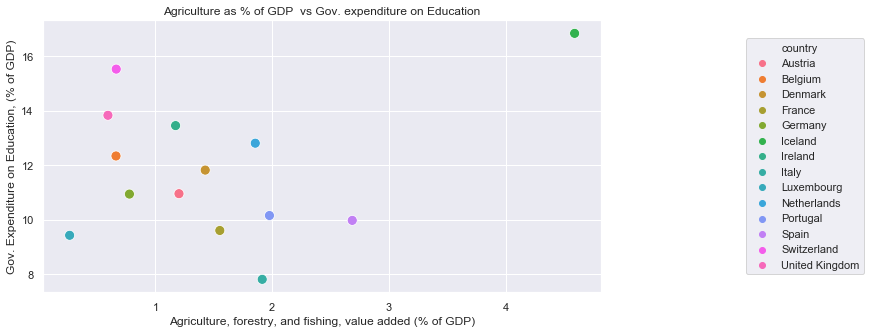

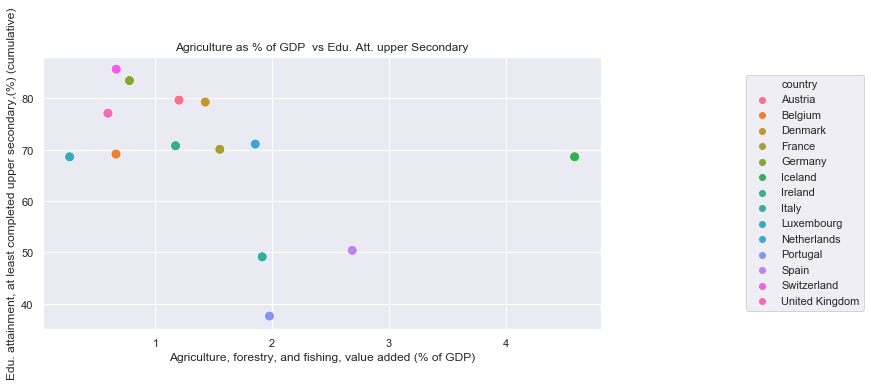

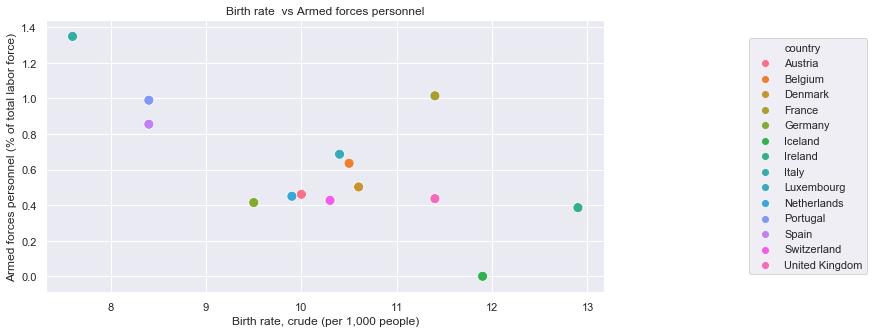

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
sns.set(rc={'figure.figsize':(10,5)})

smalldata= pd.read_csv('wbBigCountriesImputedMean.csv')

#% of GDP from Agriculture vs % of GDP from Gov. expenditure on Education
Agriculture = smalldata['Agriculture, forestry, and fishing, value added (% of GDP)'].tolist()
GovExpEdu = smalldata['Government expenditure on education, total (% of government expenditure)'].tolist()

agri_vs_edu = sns.scatterplot(data = smalldata, 
                              hue = "country",
                              x = Agriculture, 
                              y = GovExpEdu,
                              s = 100)

plt.title('Agriculture as % of GDP  vs Gov. expenditure on Education')
plt.xlabel('Agriculture, forestry, and fishing, value added (% of GDP)')
plt.ylabel('Gov. Expenditure on Education, (% of GDP)')

agri_vs_edu.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()

#% of GDP from Agriculture vs Education Attainment
EduAttain = smalldata['Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)']

agri_vs_secattain = sns.scatterplot(data = smalldata,
                                   hue = 'country',
                                   x = Agriculture,
                                   y = EduAttain,
                                   s = 100)

plt.title('Agriculture as % of GDP  vs Edu. Att. upper Secondary')
plt.xlabel('Agriculture, forestry, and fishing, value added (% of GDP)')
plt.ylabel('Edu. attainment, at least completed upper secondary,(%) (cumulative)')

agri_vs_secattain.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()


#Birth rate vs Military Personnel

Military = smalldata['Armed forces personnel (% of total labor force)']
Birth = smalldata['Birth rate, crude (per 1,000 people)']

birth_vs_military = sns.scatterplot(data = smalldata,
                                   hue = 'country',
                                   x = Birth,
                                   y = Military,
                                   s = 100)

plt.title('Birth rate  vs Armed forces personnel')
plt.xlabel('Birth rate, crude (per 1,000 people)')
plt.ylabel('Armed forces personnel (% of total labor force)')

birth_vs_military.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()




### Talyah

<span style="color:red">**<<<<<<< local**</span>

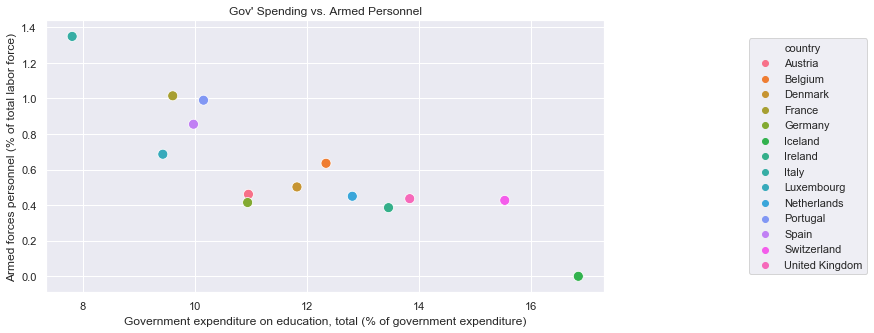

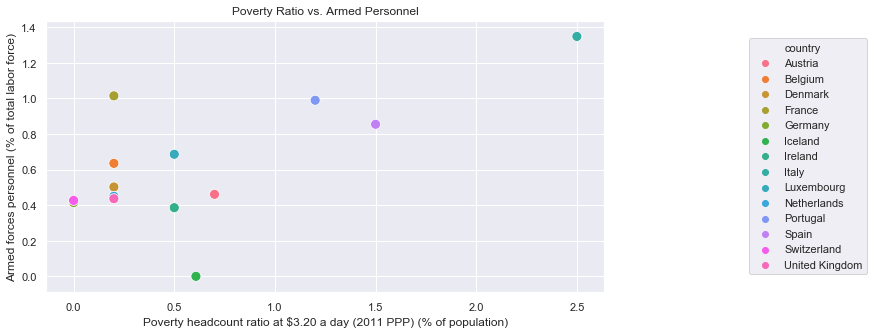

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.cm as cm
sns.set(rc={'figure.figsize':(10,5)})

info= 'wbBigCountriesImputedMean.csv'

df_armed_forces = pd.read_csv(info)

#Created a scatterplot for correlation between government spending and armed personnel using seaborn

ax = sns.scatterplot(x ='Government expenditure on education, total (% of government expenditure)', y = 'Armed forces personnel (% of total labor force)', data = df_armed_forces, hue = 'country', s = 100)

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.set_title('Gov\' Spending vs. Armed Personnel')

plt.show()


#Created a scatterplot for correlation between the poverty ratio and armed personnel using seaborn

ax = sns.scatterplot(x ='Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)', y = 'Armed forces personnel (% of total labor force)', data = df_armed_forces, hue = 'country', s = 100)

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.set_title('Poverty Ratio vs. Armed Personnel')

plt.show()

<span style="color:red">**=======**</span>

<span style="color:red">**<<<<<<< local**</span>

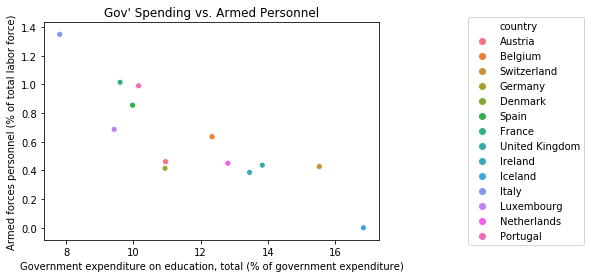

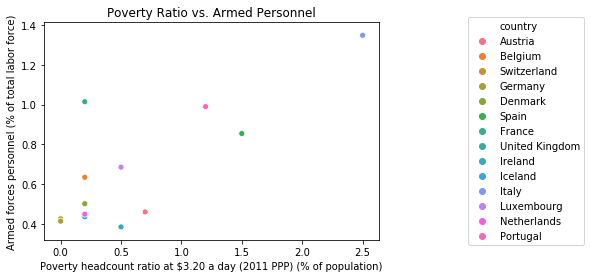

In [16]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

info= 'smalldatacountries.csv'

df_armed_forces = pd.read_csv(info)

#Created a scatterplot for correlation between government spending and armed personnel using seaborn

ax = sns.scatterplot(x ='Government expenditure on education, total (% of government expenditure)', y = 'Armed forces personnel (% of total labor force)', data = df_armed_forces, hue = 'country')

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.set_title('Gov\' Spending vs. Armed Personnel')

plt.show()


#Created a scatterplot for correlation between the poverty ratio and armed personnel using seaborn

ax = sns.scatterplot(x ='Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)', y = 'Armed forces personnel (% of total labor force)', data = df_armed_forces, hue = 'country')

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.set_title('Poverty Ratio vs. Armed Personnel')

plt.show()

<span style="color:red">**=======**</span>

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

info = 'wbQueriedMostRecentData2013-2019_LargeData.csv'

df_armed_forces = pd.read_csv(info)

#Created a scatterplot for correlation between government spending and armed personnel using seaborn

ax = sns.scatterplot(x ='Government expenditure on education, total (% of government expenditure)', y = 'Armed forces personnel (% of total labor force)', data = df_armed_forces, hue = 'country')

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.set_title('Gov\' Spending vs. Armed Personnel')

plt.show()


#Created a scatterplot for correlation between the poverty ratio and armed personnel using seaborn

ax = sns.scatterplot(x ='Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)', y = 'Armed forces personnel (% of total labor force)', data = df_armed_forces, hue = 'country')

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.set_title('Poverty Ratio vs. Armed Personnel')

plt.show()

<span style="color:red">**>>>>>>> remote**</span>

<span style="color:red">**>>>>>>> remote**</span>

### Elmir 

### Diego

In [8]:

def extractAllIndicators():
    import world_bank_data as wb

    # It's necessary to get the indicators code, this is different from the column names. 
        # E.g: Income share held by fourth 20% is coded as: SI.DST.04TH.20

    missingIndicators = missingValuesByColumn[missingValuesByColumn >= 1].index.copy()


    # Created empty dataframe with the column format that the API will return
        # We just need to append in a simple loop
    indicatorsCodedMissing = pd.DataFrame(columns = ['name', 'unit', 'source', 'sourceNote', 'sourceOrganization', 'topics'])


    # Loop to get the missing indicators and store the in the indicatorsCodedMissing data frame
    for i in list(missingIndicators):
        indicatorsCodedMissing = indicatorsCodedMissing.append(wb.search_indicators(i))

    # We can view the first the indicator names
#     print(f'{indicatorsCodedMissing.index[0:3]} \n')

    # We can view the head of the dataframe as well, we have really interesting info! 
#     indicatorsCodedMissing.head()

    # Shape of matrix 
#     indicatorsCodedMissing.shape

    return indicatorsCodedMissing

import pandas as pd

# Big Countries names
bigCountries = ['Austria','Belgium','Denmark',
                'France','Germany','Iceland', 
                'Ireland', 'Italy', 'Luxembourg', 
                'Netherlands', 'Portugal', 'Spain', 
                'Switzerland','United Kingdom']


# Read last data
<<<<<<< local
<<<<<<< local
wbFullDiego = pd.read_csv('wbQueriedMostRecentData2013-2019.csv')
wbFullDiego = pd.read_csv('wb_490NA_2019-2015.csv',)
=======
wbFullDiego = pd.read_csv('wb_490NA_2019-2015.csv')
>>>>>>> remote
=======
wbFullDiego = pd.read_csv('wb_490NA_2019-2015.csv')
>>>>>>> remote
wbFullDiego.set_index('country', inplace = True) # We set the country column as an index

# Small and big countries, how many missing values are there
wbFullDiegoNA = wbFullDiego.isnull().sum()
wbFullDiegoNA[wbFullDiegoNA >= 1].sort_values(ascending=False)


# Big countries data set creation
wbBigCountries = wbFullDiego.copy()
wbBigCountries = wbBigCountries.loc[bigCountries,:]
wbBigCountriesTranspose = wbBigCountries.transpose()
# wbBigCountries = wbBigCountries[bigCountries].transpose()

# Big countries Indicators Null values analysis, which indicators have at least 2 missing value?
wbBigCountriesNull = wbBigCountries.isnull().sum()
wbBigCountriesNull[wbBigCountriesNull >=2].sort_values(ascending = False)

# Big countries have Null values, which countries have missing values?
wbBigCountries.transpose().isnull().sum().plot(kind = 'box')
wbBigCountries.transpose().isnull().sum().sort_values(ascending = False)





# Small countries df creation
wbSmallCountries = wbFullDiego.copy()
wbSmallCountries = wbSmallCountries.drop(bigCountries)

# Small countries null values, analysis, which countries have at least one value missing?

wbSmallCountriesNull = wbSmallCountries.isnull().sum()
# wbSmallCountries[wbSmallCountriesNull[wbSmallCountriesNull < 1].index] # countries that don't have any missing value

# Missing values per country
# wbSmallCountries.transpose().isnull().sum().sort_values()

###############################################################
# Inner join for topics, still pending
# indicatorsCodedMissing = extractAllIndicators()
# wbFullDiegoTranspose = wbFullDiego.transpose()
# wbFullDiegoTranspose.columns = wbFullDiegoTranspose.iloc[0]

# indicatorsCodedMissing.set_index('name', inplace = True)
# indicatorsCodedMissing.join

# wbBigCountries

# wbBigCountriesNull[wbBigCountriesNull >=1].sort_values(ascending = False)


In [ ]:
from scipy import stats



# wbBigCountries
# stats.ks_2samp(wbBigCountries['Prevalence of HIV, total (% of population ages 15-49)'].values, 
#                               wbBigCountries['Prevalence of HIV, total (% of population ages 15-49)'].values)

wbBigCountriesBenchImputed = wbBigCountries.copy()
wbBigCountriesBenchImputed = wbBigCountriesBenchImputed.drop(['Prevalence of underweight, weight for age (% of children under 5)',
                                             'Poverty headcount ratio at national poverty lines (% of population)',
                                             'Population living in slums (% of urban population)',
                                             'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'
                                             ], axis = 1)

wbBigCountriesImputed = wbBigCountries.copy()
wbBigCountriesImputed = wbBigCountriesImputed.drop(['Prevalence of underweight, weight for age (% of children under 5)',
                                             'Poverty headcount ratio at national poverty lines (% of population)',
                                             'Population living in slums (% of urban population)',
                                             'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'
                                             ], axis = 1)

wbBigCountriesBenchImputed = wbBigCountriesBenchImputed.astype(float)
wbBigCountriesImputed = wbBigCountriesImputed.astype(float)


# wbCountriesImputed = wbCountriesImputed.reset_index()
# wbCountriesImputed.interpolate(method ='spline',order = 2).isnull().sum().sum()

for column in range(len(wbBigCountries.columns)):
    pvalue,stati = stats.ks_2samp(wbBigCountries.iloc[:,column].values, 
                   wbBigCountries.iloc[:,column].values)
# wb20132019 = pd.read_csv('wbQueriedMostRecentData2013-2019.csv') 
# wb490 = pd.read_csv('wbQueriedMostRecentData2013-2019.csv')


# p,stati = stats.ks_2samp(wbBigCountries.iloc[:,0].values, wbBigCountries.iloc[:,0].values)

# print(
#     wbBigCountries.isnull().sum().sum(),
#     wbCountriesImputed.interpolate(method ='linear', limit_direction ='forward').isnull().sum().sum())

# pValuesLinear = []

# for column in range(len(wbBigCountries.columns)):
#     pvalue,stati = stats.ks_2samp(wbBigCountries.iloc[:,column].values, 
#                    wbCountriesImputed.interpolate(method ='linear', 
#                                                   limit_direction ='forward').iloc[:,column])
    
#     pValues.append(pvalue)
    
    
pValuesMean = []

for column in range(len(wbBigCountriesBenchImputed.columns)):
#     print(column)
    
    stati,pvalue = stats.ks_2samp(wbBigCountriesBenchImputed.iloc[:,column].values, 
                       wbBigCountriesImputed.fillna(wbBigCountriesBenchImputed.mean()).iloc[:,column].values)
#     print(wbBigCountriesImputed.columns[column],pvalue)
    pValuesMean.append(pvalue)


ksPvaluesDf = pd.DataFrame({'Indicators': wbBigCountriesImputed.columns, 'KS-PValues':pValuesMean})

wbBigCountriesImputedMean = wbBigCountriesImputed.fillna(wbBigCountriesBenchImputed.mean())

for colindex in range(wbBigCountriesImputedMean.shape[1]):
    wbBigCountriesImputedMean.rename(columns =
                                     {wbBigCountriesImputedMean.columns[colindex]: wbBigCountriesImputedMean.columns[colindex] + '_IMPUTEDMEAN'},
                                     inplace = True
                                    )



# wbBigCountriesImputedMean['Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)']
pd.concat([wbBigCountriesBenchImputed,wbBigCountriesImputedMean], axis = 1).columns

# ksPvaluesDf.set_index('Indicators',inplace=True)
# ksPvaluesDf.sort_values(by = 'KS-PValues',
#                         ascending=True)


# ksPvaluesDf.loc['Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',:]

# ksPvaluesDf.iloc[16,:]
# print(mean(pValues))

In [ ]:
wbBigCountriesBenchImputedNull = wbBigCountriesBenchImputed.isnull().sum()
wbBigCountriesBenchImputedNull[wbBigCountriesBenchImputedNull >=1].sort_values(ascending = False)

#### Plots for Elmir

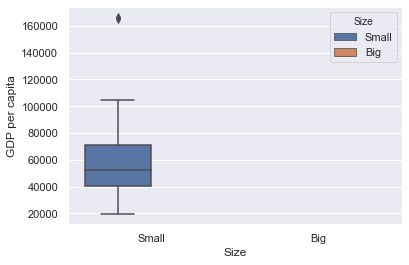

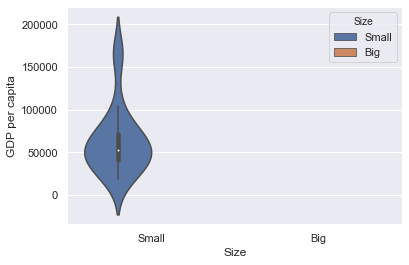

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


liExpGdpPop = pd.read_csv('Life_E.csv',
                          index_col=0,
                          thousands=',')

liExpGdpPop['Size'] =  'Small'

liExpGdpPop.loc[ 'BigCountries', 'Size'] = 'Big' 



# plt.figure(figsize=(200,200))
# g = sns.FacetGrid(hue = 'Size',data = liExpGdpPop)
# g.map(plt.scatter, "Life Expectancy", "GDP per capita", alpha=.7)
# plt.figure(figsize=(16, 6))
# liExpGdpPop.boxplot( by = 'Size',figsize=(50,50))
# liExpGdpPop.plot()

sns.boxplot(hue = 'Size', x = 'Size', y = 'GDP per capita', data = liExpGdpPop)
plt.show()
sns.violinplot(hue = 'Size', x = 'Size', y = 'GDP per capita', data = liExpGdpPop)
plt.show()


# sns.pairplot(data = liExpGdpPop,
#              x_vars = ['Life Expectancy', 'GDP per capita', 'Population '],
#              y_vars =  ['Life Expectancy', 'GDP per capita', 'Population '],
#              hue = 'Size', palette = 'plasma')

# li

In [ ]:
# 'wb_490NA_2019-2015.csv'
# wbQueriedMostRecentData2013-2019.csv
wbFullDiego = pd.read_csv('wbQueriedMostRecentData2013-2019.csv')
wbFullDiego.set_index('country', inplace = True)
wbSmallCountries = wbFullDiego.copy()
wbSmallCountries = wbSmallCountries.drop(bigCountries)
wbSmallCountriesNull = wbSmallCountries.isnull().sum()
wbSmallCountries[wbSmallCountriesNull[wbSmallCountriesNull < 1].index]


# wbFullDiego